# **<center><font style="color:rgb(100,109,254)">1</font> </center>** 
## **<center><font style="color:rgb(100,109,254)">Logistic Regression</font> </center>** 
### **<center><font style="color:rgb(100,109,254)">(MNIST Dataset)</font> </center>** 
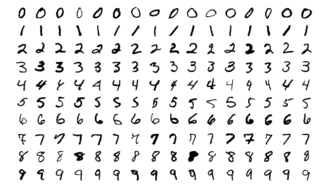

#### Load MNIST Dataset

In [8]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [17]:
x = xTrain.reshape(60000, -1)
x.shape

(60000, 784)

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [18]:
model.fit(x, yTrain)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
xTest.shape

(10000, 28, 28)

In [21]:
model.predict(xTest[0].reshape(1, -1))

array([7], dtype=uint8)

In [22]:
yTest[0]

7

In [25]:
pred = model.predict(xTest.reshape(10000,-1))

In [28]:
accuracy = model.score(xTest.reshape(10000,-1), yTest)

In [29]:
accuracy

0.9255